## **Introduction**

An astounding 2.6 million Canadian adults aged 20 and over live with diagnosed heart disease. However, the number of new diagnoses has declined from 217,600 to 162,730. Early detection and management of conditions like high blood pressure, diabetes, chest pain, and high cholesterol can continue to significantly reduce heart disease risk and diagnoses (Canada, 2022). 

Preventative care lies at the forefront of today’s healthcare system, and I hope that this analysis can provide insights into the early detection of different types of chest pain in older patients to provide accurate diagnoses and improve overall patient care and outcomes.

### **The Question I Will Be Analyzing:**

##### **Can the type of chest pain and age predict the presence of heart disease in new patients?**

I will be taking a closer look at variables such as age, chest pain, and whether or not there is a presence of heart disease.



In [ ]:
# Importing Libraries 

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)
library(readr)
library(ggplot2)


In [ ]:
set.seed(123)

# Reading the dataframe and assigning column names
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart <- read.csv(url, header = FALSE, col.names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                                         "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
                  
heart

In [ ]:
# Cleaning and wrangling my data into tidy format

heart[heart == "?" ] <- NA

heart_clean <- heart |>
  mutate(cp = as.factor(cp), 
         num = as.factor(ifelse(num > 0, 1, 0)))  

heart_clean <- na.omit(heart_clean)

# Spliting the data into training and testing sets
set.seed(123) 

heart_split <- initial_split(heart_clean, prop = 0.75, strata = num)

heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train

my_train_data <- heart_train |>
    select(age, cp , num)

my_train_data

In [136]:
# Summarization

age_summary <- heart_train  |>
  group_by(cp, num)  |>
  summarise(mean_age = mean(age))  

age_summary

`summarise()` has grouped output by 'cp'. You can override using the `.groups`
argument.


cp,num,mean_age
<fct>,<fct>,<dbl>
1,0,53.90909
1,1,53.20000
2,0,49.26667
⋮,⋮,⋮
3,1,57.71429
4,0,55.65517
4,1,56.25333


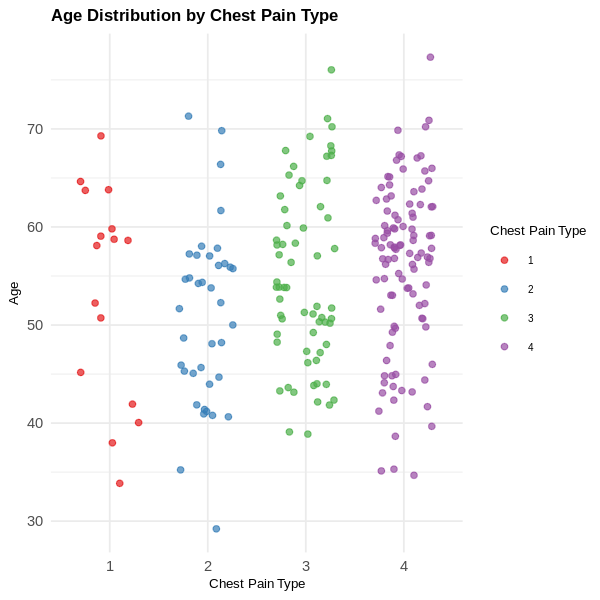

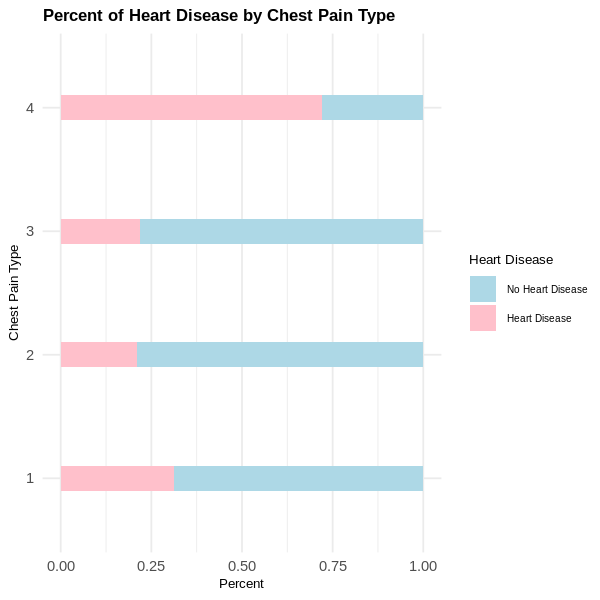

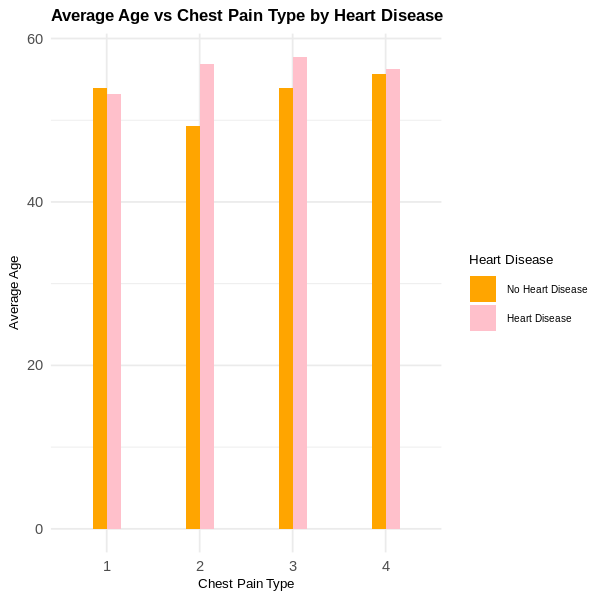

In [141]:
# Plotting the data:

options(repr.plot.width = 5, repr.plot.height = 5)

# Age distribution vs chest pain type
age_cp_plot <- heart_train  |>
  ggplot(aes(x = cp, y = age, color = cp)) +
  geom_point(position = position_jitter(width = 0.3), alpha = 0.7) +
  labs(title = "Age Distribution by Chest Pain Type", x = "Chest Pain Type", y = "Age", color = "Chest Pain Type") +
  scale_color_brewer(palette = "Set1") +
  theme_minimal() +
  theme(plot.title = element_text(size = 10, face = "bold"),
        axis.title.x = element_text(size = 8),
        axis.title.y = element_text(size = 8),
        legend.title = element_text(size = 8),
        legend.text = element_text(size = 6))   #Changed text size for legibility in Github

age_cp_plot

# Percent of heart disease vs chest pain type
heart_cp_plot <- heart_train |>
  ggplot(aes(x = cp, fill = num)) +
  geom_bar(position = "fill", width = 0.2) +
  labs(title = "Percent of Heart Disease by Chest Pain Type", 
       x = "Chest Pain Type", 
       y = "Percent", 
       fill = "Heart Disease") +
  coord_flip() + 
  scale_fill_manual(values = c("lightblue", "pink"),
                    labels = c("No Heart Disease", "Heart Disease")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 10, face = "bold"),
        axis.title.x = element_text(size = 8),
        axis.title.y = element_text(size = 8),
        legend.title = element_text(size = 8),
        legend.text = element_text(size = 6)) 

heart_cp_plot

# Average Age vs Chest Pain Type by Heart Disease

age_cp_heart_plot <- age_summary  |>
  ggplot(aes(x = cp, y = mean_age, fill = num)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.3) +
  labs(title = "Average Age vs Chest Pain Type by Heart Disease",
       x = "Chest Pain Type", y = "Average Age", fill = "Heart Disease") +
  scale_fill_manual(values = c("orange", "pink"),
                    labels = c("No Heart Disease", "Heart Disease")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 10, face = "bold"),
        axis.title.x = element_text(size = 8),
        axis.title.y = element_text(size = 8),
        legend.title = element_text(size = 8),
        legend.text = element_text(size = 6)) 

age_cp_heart_plot

## **Methods**

For this project, I will be using the Heart Disease dataset from the UCI Machine Learning Repository.

#### **Variables I Will Be Looking At:**

- **Age**
- **Chest Pain Type (cp):**
  - 1: Typical angina
  - 2: Atypical angina
  - 3: Non-anginal pain
  - 4: Asymptomatic
- **Target (num):** The presence of heart disease, where 0 indicates no heart disease and 1 indicates the presence of heart disease.

For the data cleaning and wrangling, I handled “?” by assigning it to NA and converting necessary variables to appropriate types (e.g., factor for categorical variables like cp and num). I used `set.seed(123)` to ensure the data split is reproducible. I then split my data into training and testing with a 75% and 25% split. This proposal works mainly with the training split dataset. 

Next, I summarized my data. The code groups the `heart_train` dataset by chest pain type and heart disease status, then calculates the mean age for each group. The resulting summary table, `age_summary`, shows the average age for each unique combination of chest pain type and heart disease status. I used this summary for my third plot.

Lastly, I plotted my data and created three graphs. The first plot represents the age distribution vs chest pain type, providing insight into which chest pain type is most common in different age groups. The second plot represents the percent of heart disease vs chest pain type, offering insight into which chest pain type is most associated with a heart disease diagnosis. For example, people with asymptomatic chest pain type are more likely to have heart disease. The third plot represents the average age vs chest pain type by their heart disease diagnosis.



## **Impact and Future Questions**

Expected outcomes include finding that chest pain types non-anginal pain and asymptomatic (3 and 4) and older ages are linked to higher heart disease risk. 

Future questions might explore the impact of other variables like gender(sex) or lifestyle (smoking or no smoking) on heart disease risk and prevention.

## **References**

Canada, P. H. A. of. (2022, July 28). Government of Canada. Canada.ca. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html

Detrano, R., Janosi, A., Steinbrunn, W., & Pfisterer, M. (1988). Heart disease. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease 